In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
try:
    df = pd.read_csv('data/insurance.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")

Data loaded successfully.


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


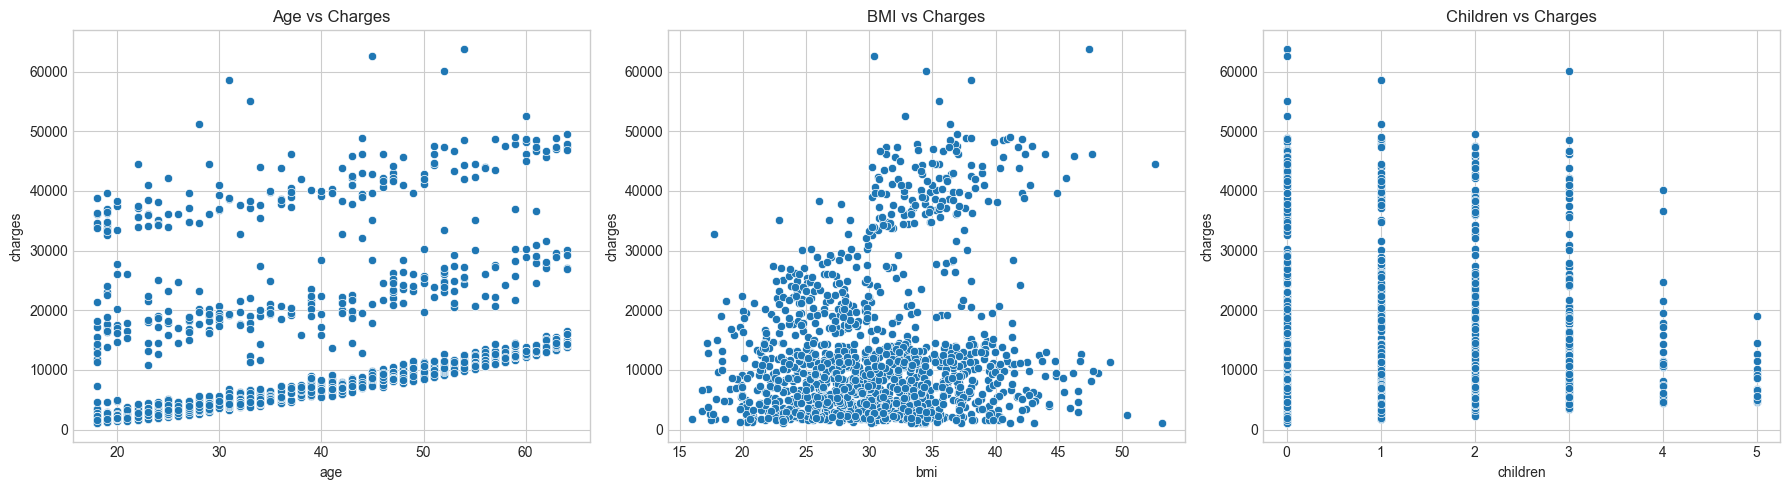

In [12]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')

plt.subplot(1,3,2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')

plt.subplot(1,3,3)
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')

plt.tight_layout()
plt.show()

In [13]:
X = df[['age']]
y = df['charges']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


In [18]:
print(f"\nIntercept: {model.intercept_:.2f}")
print(f"Coefficient for Age: {model.coef_[0]:.2f}")


Intercept: 3876.93
Coefficient for Age: 240.60


In [19]:
y_pred = model.predict(X_test)

In [20]:
r2 = metrics.r2_score(y_test, y_pred)
print(f"\nR-squared (R2 Score): {r2:.2f}")


R-squared (R2 Score): 0.12


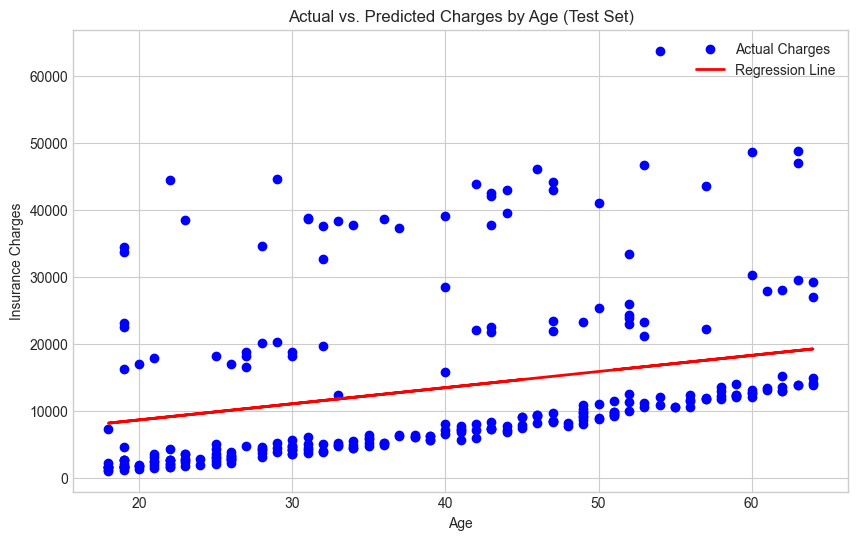

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Charges')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Actual vs. Predicted Charges by Age (Test Set)')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()